# Classificadores Bayesianos 

Fala, pessoal! Tudo bem? Este é o primeiro artigo de uma série sobre **classificadores bayesianos**. Mas antes de começar a falar propriamente dos métodos de estimação desses classificadores,

Um classificador bayesiano é um método de estimação de probabilidades baseado no **Teorema de Bayes**. Os algoritmos dessa classe possuem a mesma forma, alterando somente as suposições necessárias para estimar as probabilidades condicionais.

Antes de começar a falar propriamente dos algoritmos, vamos fazer uma breve revisão do Teorema de Bayes.

## Teorema de Bayes

O Teorema de Bayes nos diz como podemos calcular a probabilidade P(A|B) de um evento A acontecer dado que outro evento B já aconteceu conhecendo 3 elementos:

* P(A): probabilidade do evento A acontecer;
* P(B): probabilidade do evento B acontecer;
* P(B|A): probabilidade do evento B acontecer dado que o evento A já aconteceu.

Matematicamente, temos a seguinte relação:

\begin{equation}
    P(A|B) = \frac{P(B|A)P(A)}{P(B)} 
\end{equation}

Não é escopo do curso deduzirmos essa expressão, mas para o leitor mais curioso vamos deixar a demonstração abaixo.

<details>
    <summary>Demonstração - Teorema de Bayes</summary>

    <p>Detailed content goes here …</p>
</details>

### Teorema de Bayes em Machine Learning

Vamos pensar no nosso problema de classificação: o intuito de construir um modelo é determinar a qual classe Y determinado exemplo pertence baseado somente em suas variáveis explicativas X. Transportando essa ideia para a notação de probabilidade, o que realmente queremos encontrar é:
$P(Y=y|X=x)$, a probabilidade da amostrar ser da classe *y* dado que eu observo as variáveis explicativas *x*.

A rigor, pelo teorema, precisamos de 3 probabilidades:

- P(Y=y): probabilidade de alguma amostra aleatória ser da classe y;
- P(X=x): probabilidade de observarmos a ocorrência das variáveis explicativas x;
- P(X=x|Y=y): probabilidade de observarmos a ocorrência das variáveis explicativas x dado que a amostra pertence à classe y.

Com essas estimativas, podemos agora calcular: 

$$P(Y=y|X=x) = \frac{P(X=x|Y=y)P(Y=y)}{P(X=x)}$$

Para determinar qual a classe de cada amostra, basta calcular a probabilidade acima para cada possível classe. Aquela que apresentar maior probabilidade será a classe escolhida. 

Vamos usar um exemplo mais prático para fixar o conhecimento. Suponha que nossa tarefa seja prever se um e-mail é ou não um *spam* e que para isso, vamos usar uma variável binária que indica a ocorrência da palavra "oferta" no corpo no e-mail (1 - aparece, 0 - não aparece). Para efeitos didáticos, vamos considerar a seguinte base com 10 amostras:

In [1]:
import pandas as pd

pd.DataFrame({"Oferta": [0,1,0,0,1,1,0,1,1,0],
              "Spam": [0,0,0,0,1,0,0,1,1,1]})

,Oferta,Spam
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
5,1,0
6,0,0
7,1,1
8,1,1
9,0,1


Vamos reescrever o Teorema de Bayes com a novas variáveis:

<br>
$$P(Spam|Oferta) = \frac{P(Oferta|Spam)P(Spam)}{P(Oferta)}$$
<br>

Vamos começar estimando as probabilidades dos valores de cada variável. Como as duas variáveis são binárias, temos somente duas possibilidades para cada uma: $P(Oferta = 1)$, $P(Oferta = 0)$, $P(Spam = 1)$, $P(Spam = 0)$.

Analisando a base, a variável *Oferta* possui 5 observações "1" e 5 observações "0". Com isso temos:

$$P(Oferta = 1) = 0.5$$
$$P(Oferta = 0) = 0.5$$

Já a variável *Spam* tem 4 observações "1" e 6 observações "0". Assim, temos as seguintes probabilidades:

$$P(Spam = 1) = 0.4$$
$$P(Spam = 0) = 0.6$$

Precisamos agora estimar a probabilidade P(Oferta|Spam). Vamos analisar primeiro quando Spam = 0.

In [2]:
pd.DataFrame({"Oferta": [0,1,0,0,1,1,0,1,1,0],
              "Spam": [0,0,0,0,1,0,0,1,1,1]}).query("Spam == 0")

,Oferta,Spam
0,0,0
1,1,0
2,0,0
3,0,0
5,1,0
6,0,0


Temos então 6 amostras no total, com 2 observações "1" e 4 observações "0", o que nos dá as seguintes probabilidades:

$$P(Oferta=1|Spam=0) = 0.33$$
$$P(Oferta=0|Spam=0) = 0.67$$

Vamos analisar agora quando Spam = 1.

In [3]:
pd.DataFrame({"Oferta": [0,1,0,0,1,1,0,1,1,0],
              "Spam": [0,0,0,0,1,0,0,1,1,1]}).query("Spam == 1")

,Oferta,Spam
4,1,1
7,1,1
8,1,1
9,0,1


Agora temos 4 amostras, das quais 3 são "1" e 1 é "0". Nossas probabilidades agora são:

$$P(Oferta=1|Spam=1) = 0.75$$
$$P(Oferta=0|Spam=1) = 0.25$$

Já temos agora todas as probabilidades que precisamos para estimar $P(Spam|Oferta)$. Como exemplo, vamos pegar uma nova amostra na qual a variável *Oferta* é "1". Queremos encontrar a probabilidade de o e-mail ser um spam dado que a palavra oferta apareceu no texto.

Matematicamente, queremos $P(Spam=1|Oferta=1)$. Pelo Teorema de Bayes:

<br>
\begin{equation}
P(Spam=1|Oferta=1) = \frac{P(Oferta=1|Spam=1)P(Spam=1)}{P(Oferta=1)}
\end{equation}

<br>
\begin{equation}
P(Spam=1|Oferta=1) = \frac{0.75*0.4}{0.5} = 0.6
\end{equation}

Muito bom! Agora já sabemos que quando a palavra oferta aparece temos 60% de chance de o e-mail ser um Spam. 

Suponha agora que queiramos calcular a probabilidade de não ser spam quando a palavra oferta aparece. Como 

$$P(Spam=0|Oferta=1) = 1 - P(Spam=1|Oferta=1),$$

então 

$$P(Spam=0|Oferta=1) = 0.4$$

Mesmo assim, vamos escrever a equação completa segundo o Teorema de Bayes para:

<br>
\begin{equation}
P(Spam=0|Oferta=1) = \frac{P(Oferta=1|Spam=0)P(Spam=0)}{P(Oferta=1)}
\end{equation}

Podemos observar que a única probabilidade que aparece tanto na expressão de $P(Spam=1|Oferta=1)$ quanto em $P(Spam=0|Oferta=1)$ é $P(Oferta=1)$, no denominador. Podemos concluir com isso que $P(Oferta=1)$ não interfere na nossa classificação pois é um fator comum nas duas espressões.

No nosso exemplo, só temos duas classes, mas caso tivessemos mais classes veríamos que o mesmo comportamento se repete. Transportando para um exemplo genérico, a conclusão é que para realizar a classificação não precisamos calcular $P(X)$, o que reduz muito nosso custo computacional. O "problema" é que agora nosso *score* não é mais uma estimativa de probabilidades. isso pode ser facilmente resolvido após o cálculo de todos os *scores*, normalizando-os para que sua soma seja igual a 1.

Eliminando a necessidade de calcular $P(X)$ só precisamos agora de $P(Y)$ e $P(X|Y)$. $P(Y)$ é talvez o parâmetro mais fácil de estimar, bastando fazer uma análise de frequência nas classes, exatamente como fizemos. Calcular $P(X|Y)$ pode ser um desafio maior. No nosso exemplo, foi relativamente simples, mas na maioria dos casos teremos dados multivariados, com variáveis contínuas e categóricas, o que dificulta a estimativa dessa probabilidade.

Para tratarmos o problema, temos que fazer algumas suposições sobre as propriedades e a distribuição dessas variáveis. Dependendo da suposição que fazemos, temos um algoritmo diferente. Discutiremos 3 deles a seguir.

## Naive Bayes

Vamos agora entrar nos algoritmos que tem como base o Teorema de Bayes. Mas antes vamos dar uma olhada nos dados que trabalharemos daqui para frente.

In [1]:
from scipy.stats import norm, chi2
import numpy as np

In [2]:
x_lin = np.linspace(-2,2,100)
x_norm = norm.rvs(size=1000)
x_chi2 = chi2.rvs(1, size=1000)

In [6]:
y = np.random.randint(low=0,high=2, size=1000)

In [7]:
pd.DataFrame({"X_1": x_norm,
              "X_2": x_chi2,
              "Y": y}).head()

,X_1,X_2,Y
0,0.527747,1.041476,0
1,0.260825,2.075336,0
2,0.106636,0.363943,1
3,-1.178337,0.707059,1
4,-0.839354,1.070463,1


A base consiste em 2 variáveis explicativas contínuas e uma variável alvo binária.

Se tentarmos fazer a mesma análise do exemplo anterior teremos dois problemas principais:

1. As variáveis agora são contínuas e não mais binárias, portanto não conseguimos mais estimar a probabilidade calculando frequências;
2. Temos um problema multivariado em mãos e não mais uma única variável explicativa, então como podemos estimar a probabilidade de uma amostra existir?

Vamos começar endeçando o problema número 2. Quando temos um X multivariado, a probabilidade de uma amostra é na verdade a probabilidade conjunta de que cada variável assuma determinado valor ao mesmo tempo, ou seja:

$$P(X={x_1, x_2, ..., x_n}) = P(X_1 = x_1\ \cap\ X_2 = x_2\ \cap\ ...\ \cap\ X_n = x_n)$$

Estimar a probabilidade conjunta de um grande número de variáveis pode ser uma tarefa muito complicada. Porém, pela Regra da Multiplicação, sabemos que 

$$P(X_1 = x_1\ \cap\ X_2 = x_2\ ... \cap\ X_n = x_n) = $$
$$ P(X_1 = x_1)P(X_2 = x_2\ ... \cap\ X_n = x_n|X_1 = x_1)=$$
$$P(X_1 = x_1)P(X_2 = x_2|X_1 = x_1)P(X_3 = x_3 \ ... \cap\ X_n = x_n|X_1 = x_1\ \cap\ X_2 = x_2)=$$
$$...$$
$$P(X_1=x_1)\prod_{i=2}^n P(X_i=x_i|X_{i-1}=x_{i-1}\ \cap \ ... \ \cap X_1=x_1)$$

A probabilidade acima é muito complicada de ser estimada dado que temos várias probabilidades condicionais. Entretanto, existe um truque para simplicarmos a expressão. Se supormos que todas as variáveis são independentes, podemos escrever:

$$P(X_1 = x_1\ \cap\ X_2 = x_2\ ... \cap\ X_n = x_n) = \prod_{i=1}^n P(X_i=x_i)$$

Na realidade, sabemos que as variáveis não são totalmente independentes, mas mesmo assim vamos supor que exista tal independência. O algoritmo é chamado Naive Bayes justamente por que estamos fazendo uma suposição muito simplista para facilitarmos os cálculos.

Da mesma forma, podemos reescrever essa expressão considerando uma probabilidade condicional:

$$P(X_1 = x_1\ \cap\ X_2 = x_2\ ... \cap\ X_n = x_n|Y=y) = \prod_{i=1}^n P(X_i=x_i|Y=y)$$

A expressão para o classificador agora é:

$$P(Y|X) = \frac{P(Y)\prod_{i=1}^n P(X_i|Y)}{P(X)}$$

Sempre lembrando que quando queremos saber somente a classe, não precisamos estimar $P(X)$.

Ótimo! Solucionamos o problema de múltiplas variáveis. Mas continuamos com o problema 1: a dificuldade de estimar a probabilidade de uma variável contínua.

Uma solução é supor, ainda que não seja totalmente verdade, que todas as variáveis tem distribuição normal (gaussiana) e estimar, através de métodos de Máxima Verossimilhança (MLE) os parâmetros para aquela distribuição.

Uma variável aleatória com distribuição normal tem a seguinte função densidade de probabilidade (*pdf* do inglês *probability density funciton*):

$$f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})},$$

na qual $\mu$ é a média e $\sigma$ é o desvio padrão.

Graficamente ela tem o seguinte aspecto:

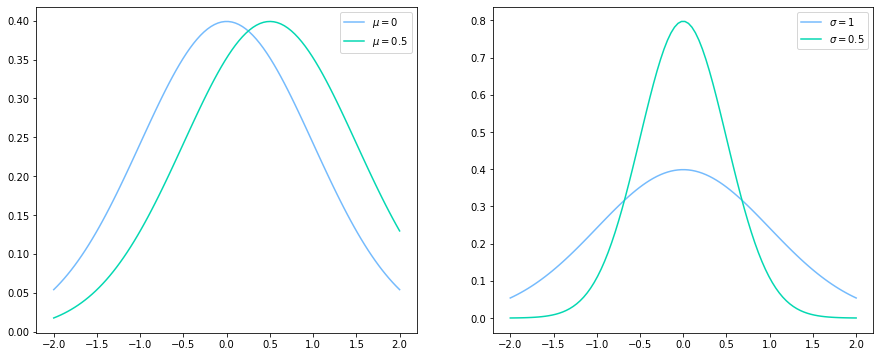

In [4]:
import matplotlib.pyplot as plt

y_norm = norm.pdf(x_lin)

fig, axes = plt.subplots(ncols=2,figsize=(15, 6))
axes[0].plot(x_lin, y_norm, label=r"$\mu = 0$", c="xkcd:sky blue");
axes[0].plot(x_lin, norm.pdf(x_lin, loc=0.5), label=r"$\mu = 0.5$", c="xkcd:aquamarine");
axes[0].legend()

axes[1].plot(x_lin, y_norm, label=r"$\sigma = 1$", c="xkcd:sky blue");
axes[1].plot(x_lin, norm.pdf(x_lin, scale=0.5), label=r"$\sigma = 0.5$", c="xkcd:aquamarine");
axes[1].legend();
plt.show()

Vamos dar uma olhada nas nossas variáveis, se eles possuem essa forma.

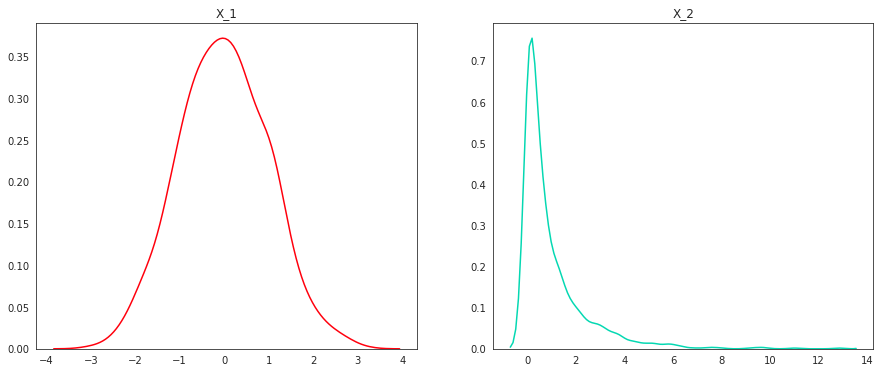

In [19]:
import seaborn as sns

sns.set_style("white")
fig, axes = plt.subplots(ncols=2,figsize=(15, 6))

sns.kdeplot(x_norm, ax=axes[0], color="xkcd:bright red")
axes[0].set_title("X_1")
sns.kdeplot(x_chi2, ax=axes[1], color="xkcd:aquamarine")
axes[1].set_title("X_2");

Podemos observar que a variável "X_1" apresenta comportamento muito parecido com a distribuição normal, mas que "X_2" tem uma calda à direita que não existe na gaussiana. A ideia é mostrar que essa suposição que nossos dados são normais não necessariamente é verdade e é mais uma fonte de possíveis erros
no modelo.

Esse exemplo mostrou como podemos estimar a probabilidade de uma variável contínua. A ideia para casos discretos é exatamente a mesmo: sempre supomos que os dados seguem alguma distribuição. No caso de variáveis binárias, podemos supor uma distribuição de Bernoulli enquanto em variáveis categóricas com mais classes podemos supor uma Multinomial, por exemplo.

A biblioteca Scikit-Learn possui alguns modelos já implementados do Naive Bayes, para diversos tipos de variáveis. Uma limitação dessas implementações é que só conseguimos utilizar bases com um tipo de dados. Por exemplo, não conseguimos utilizar uma base com variáveis binárias e contínuas. Seguem abaixo um mapeamento do tipo de variável e quais as implementações para elas:

* **Contínuas**: GaussianNB
* **Categóricos**: MultinomialNB, CategoricalNB
* **Binários**: BernoulliNB

## LDA e QDA

No Naive Bayes, fazíamos duas suposições a respeito das variáveis explicativas:

1. Elas são independentes;
2. Individualmente, elas seguem algum tipo de distribuição definida a priori.

O LDA (Linear Discriminant Analysis) e o QDA(Quadratic Discriminant Analysis) também fazem suposições, mas temos algumas diferenças:

1. Não assumimos mais que as variáveis agora são independentes mas sim que existe correlação entre elas;
2. Supomos agora que as variáveis possuem uma distribuição normal multivariada.

Mas o que é uma distribuição normal multivariada? Nada mais é que uma generalização da distribuição normal quando temos mais de uma variável. A *pdf* dela é:

$$f(\mathbf{x}; \mathbf{\mu}, \mathbf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^k|\Sigma|}}exp(-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T\Sigma^{-1}(\mathbf{x} - \mathbf{\mu})),$$

na qual $\mathbf{\mu}$ é o vetor de médias, $\mathbf{\Sigma}$ é a matriz de covariância e $k$ é a dimensão do vetor $\mathbf{x}$.

Graficamente, temos:

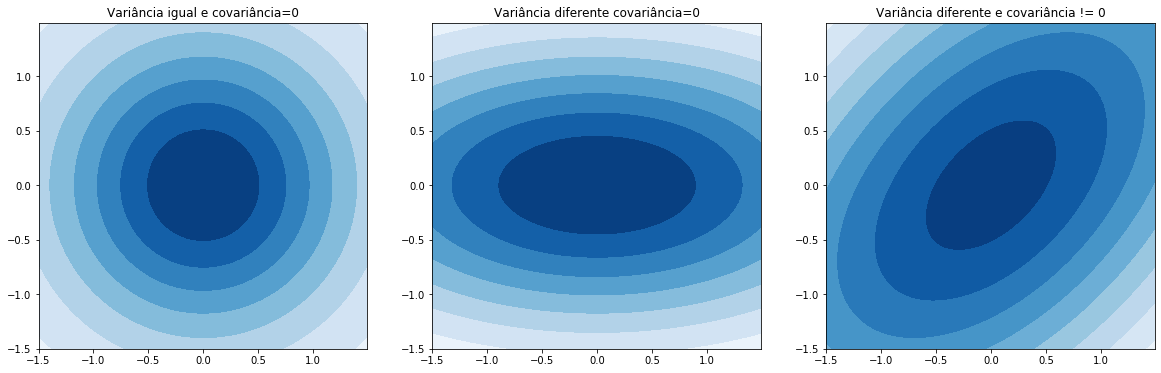

In [7]:
from scipy.stats import multivariate_normal

x, y = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
pos = np.dstack((x, y))

fig, axes = plt.subplots(ncols=3, figsize=(20, 6))

rv = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
axes[0].contourf(x, y, rv.pdf(pos), cmap="Blues")
axes[0].set_title("Variância igual e covariância=0")

rv = multivariate_normal(mean=[0,0], cov=[[4,0],[0,1]])
axes[1].contourf(x, y, rv.pdf(pos), cmap="Blues")
axes[1].set_title("Variância diferente covariância=0")

rv = multivariate_normal(mean=[0,0], cov=[[4,2],[2,4]])
axes[2].contourf(x, y, rv.pdf(pos), cmap="Blues")
axes[2].set_title("Variância diferente e covariância != 0");
plt.show()

Suponha que tenhamos duas classes $Y=0$ e $Y=1$. Para calcular as probabilidades $P(X|Y)$ precisamos estimar 4 parâmetros:

* $\mathbf{\mu_0}$ e $\mathbf{\Sigma_0}$
* $\mathbf{\mu_1}$ e $\mathbf{\Sigma_1}$

Baseado nesses parâmetros, o LDA faz mais uma suposição:

$$\mathbf{\Sigma} = \mathbf{\Sigma_0} = \mathbf{\Sigma_1},$$

em que $\mathbf{\Sigma}$ é a matrix de covariância na base inteira.

Mas o isso significa na prática? Olhando os gráficos da normal multivariada, podemos ver que a matriz de covariância é o que determina o formato da distribuição, enquanto que o vetor de médias indica o seu centro. Quando supomos que todas as classes tem mesma matriz de covariância $\mathbf{\Sigma}$ mas podem possuir vetores de médias diferentes, estamos dizendo que estamos procurando distribuções que possuem o mesmo formato, mas que podem estar em regiões diferentes do espaço.

Já o QDA, estima uma matriz de covariância para cada classe. Dessa forma, podemos encontrar classes não só em diferentes regiões, mas também com diferentes formatos de distribuição.

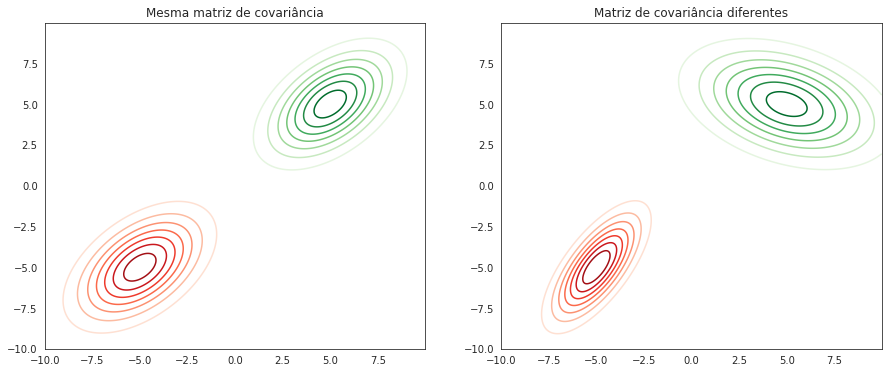

In [20]:
x, y = np.mgrid[-10:10:.01, -10:10:.01]
pos = np.dstack((x, y))

fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

rv = multivariate_normal(mean=[-5,-5], cov=[[4,2],[2,4]])
axes[0].contour(x, y, rv.pdf(pos), cmap="Reds")
rv = multivariate_normal(mean=[5,5], cov=[[4,2],[2,4]])
axes[0].contour(x, y, rv.pdf(pos), cmap="Greens")
axes[0].set_title("Mesma matriz de covariância")

rv = multivariate_normal(mean=[-5,-5], cov=[[2,2],[2,4]])
axes[1].contour(x, y, rv.pdf(pos), cmap="Reds")
rv = multivariate_normal(mean=[5,5], cov=[[8,-2],[-2,4]])
axes[1].contour(x, y, rv.pdf(pos), cmap="Greens")
axes[1].set_title("Matriz de covariância diferentes");

Vamos analisar então como o LDA e o QDA se saíriam nos cenários em que nossos dados são tirados de duas distribuições normais com mesma matriz de covariância e quando eles são amostrados de distribuições com matrizes diferentes.

### Mesma matriz de covariância

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

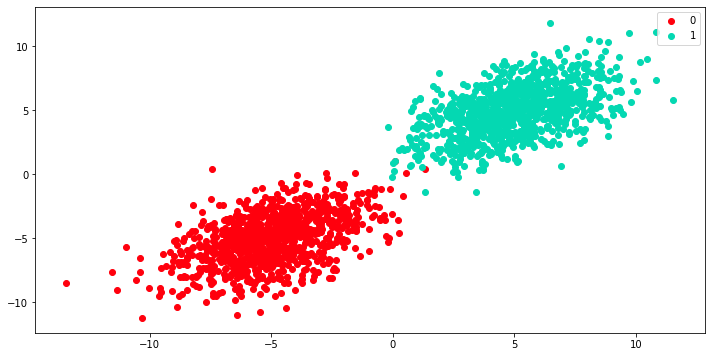

In [8]:
rv = multivariate_normal(mean=[-5,-5], cov=[[4,2],[2,4]])
x_zero = rv.rvs(size=1000)
rv = multivariate_normal(mean=[5,5], cov=[[4,2],[2,4]])
x_one = rv.rvs(size=1000)

X = np.concatenate([x_zero, x_one])
y = np.array(1000*[0] + 1000*[1])

plt.figure(figsize=(12,6))
plt.scatter(x_zero[:, 0], x_zero[:, 1], c="xkcd:bright red", label="0")
plt.scatter(x_one[:, 0], x_one[:, 1], c="xkcd:aquamarine", label="1")
plt.legend();
plt.show()

In [9]:
lda = LDA(store_covariance=True).fit(X, y)
mean_0_lda, mean_1_lda = lda.means_[0,:], lda.means_[1,:]
covariance_lda = lda.covariance_

qda = QDA(store_covariance=True).fit(X, y)
mean_0_qda, mean_1_qda = qda.means_[0,:], qda.means_[1,:]
cov_0_qda, cov_1_qda = qda.covariance_[0], qda.covariance_[1]

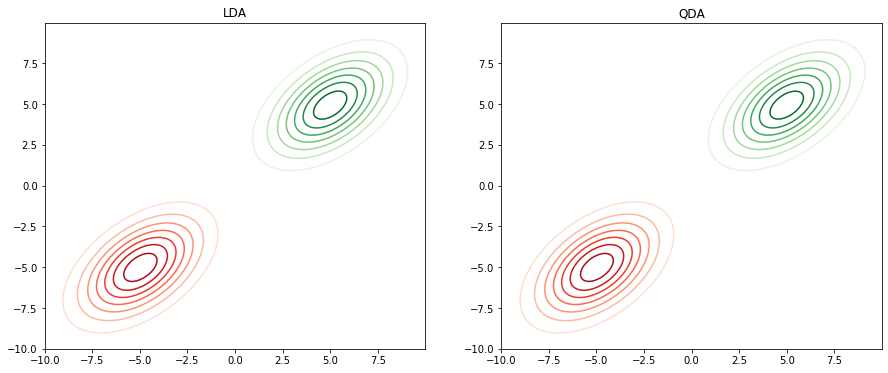

In [10]:
x, y = np.mgrid[-10:10:.01, -10:10:.01]
pos = np.dstack((x, y))

fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

rv = multivariate_normal(mean=mean_0_lda, cov=covariance_lda)
axes[0].contour(x, y, rv.pdf(pos), cmap="Reds")
rv = multivariate_normal(mean=mean_1_lda, cov=covariance_lda)
axes[0].contour(x, y, rv.pdf(pos), cmap="Greens")
axes[0].set_title("LDA")

rv = multivariate_normal(mean=mean_0_qda, cov=cov_0_qda)
axes[1].contour(x, y, rv.pdf(pos), cmap="Reds")
rv = multivariate_normal(mean=mean_1_qda, cov=cov_1_qda)
axes[1].contour(x, y, rv.pdf(pos), cmap="Greens")
axes[1].set_title("QDA");

Para esse caso, podemos ver que ambos os modelos dão praticamente o mesmo resultado e os dois estimam muito bem a real distribuição dos dados.

### Matrizes de covariância diferentes

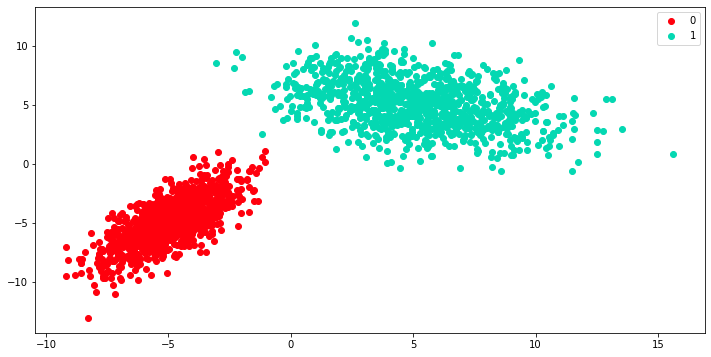

In [11]:
rv = multivariate_normal(mean=[-5,-5], cov=[[2,2],[2,4]])
x_zero = rv.rvs(size=1000)
rv = multivariate_normal(mean=[5,5], cov=[[8,-2],[-2,4]])
x_one = rv.rvs(size=1000)

X = np.concatenate([x_zero, x_one])
y = np.array(1000*[0] + 1000*[1])

plt.figure(figsize=(12,6))
plt.scatter(x_zero[:, 0], x_zero[:, 1], c="xkcd:bright red", label="0")
plt.scatter(x_one[:, 0], x_one[:, 1], c="xkcd:aquamarine", label="1")
plt.legend();

In [12]:
lda = LDA(store_covariance=True).fit(X, y)
mean_0_lda, mean_1_lda = lda.means_[0,:], lda.means_[1,:]
covariance_lda = lda.covariance_

qda = QDA(store_covariance=True).fit(X, y)
mean_0_qda, mean_1_qda = qda.means_[0,:], qda.means_[1,:]
cov_0_qda, cov_1_qda = qda.covariance_[0], qda.covariance_[1]

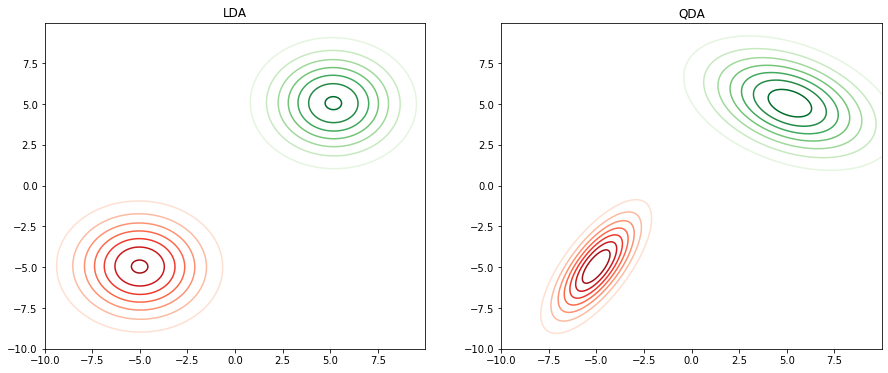

In [13]:
x, y = np.mgrid[-10:10:.01, -10:10:.01]
pos = np.dstack((x, y))

fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

rv = multivariate_normal(mean=mean_0_lda, cov=covariance_lda)
axes[0].contour(x, y, rv.pdf(pos), cmap="Reds")
rv = multivariate_normal(mean=mean_1_lda, cov=covariance_lda)
axes[0].contour(x, y, rv.pdf(pos), cmap="Greens")
axes[0].set_title("LDA")

rv = multivariate_normal(mean=mean_0_qda, cov=cov_0_qda)
axes[1].contour(x, y, rv.pdf(pos), cmap="Reds")
rv = multivariate_normal(mean=mean_1_qda, cov=cov_1_qda)
axes[1].contour(x, y, rv.pdf(pos), cmap="Greens")
axes[1].set_title("QDA");

Nesse segundo caso, vemos que o LDA tentou compensar a diferença tanto de escala quanto de rotação e acabou prejudicando a estimativa das dias distribuições. Enquanto isso, o QDA conseguiu realizar estimativas diferentes para cada classe, melhorando seus resultados.